### Logistic Regression

True Negative rate (specificity):  0.9999031880906457
True positive rate (recall):  0.7611731843575419
False Negative Rate:  0.2388268156424581
False positive rate:  9.681190935428852e-05
Positive Likelihood ratio:  3.1871345029239766


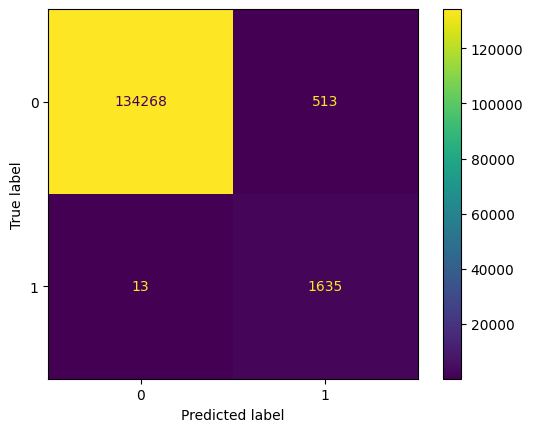

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

df = pd.read_csv('./data/preprocessed.csv')
# Scale data
scaler = StandardScaler()
for i in range(5):
    df.iloc[:,i] = scaler.fit_transform(df.iloc[:,i].values.reshape(-1,1))

# Prepare data for training
X = df.drop('Machine failure', axis=1).values
y = df['Machine failure'].values


clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
cm = confusion_matrix(clf.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [4]:
# Save model with pickle
import pickle
import os
models_dir = 'models'
# Encoding of the filename is the following: modelname_KernelType_Cvalue_*otherParams.sav
filename = 'logistic_regr.sav'
pickle.dump(clf, open(os.path.join(models_dir,filename), 'wb'))